# Load the merged dataset

In [80]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

data_merged = pd.read_csv('../lung_pollution/data/covid_pollution_clean.csv')

data_merged.shape

(4000, 22)

In [3]:
data_merged.head()

,Unnamed: 0,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,...,PM10_daysOver50,PM2.5_annualMean,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
0,0,Berlin,2010,21.33097,0.0,4.689645,48.14162,1.321674,75.383964,179.320467,...,30.28571,20.56858,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091
1,1,Berlin,2011,21.10792,0.0,5.591758,46.78272,1.405013,75.515257,179.361973,...,25.57143,20.17655,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091
2,2,Berlin,2012,20.65600,0.0,5.372472,45.26885,1.513209,75.685711,179.415858,...,11.00000,17.18541,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091
3,3,Berlin,2013,19.16632,0.0,4.376160,47.91164,0.142857,73.145140,171.855700,...,13.00000,15.83933,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091
4,4,Berlin,2014,20.46666,0.0,15.755060,47.80345,0.000000,71.659810,181.968600,...,22.00000,19.77463,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091


There are no nulls in the data

In [75]:
data_merged = data_merged.rename(columns={'PM2.5_annualMean': 'PM2_5_annualMean'})

# Detecting Outliers

## NO2 Annual Mean

<AxesSubplot:>

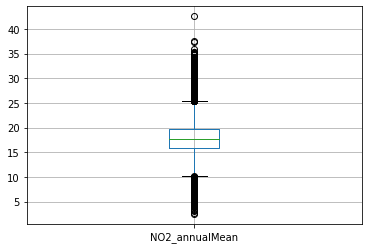

In [10]:
data_merged[['NO2_annualMean']].boxplot()

I wouldn't do anything about it, since these values are possible in the reality

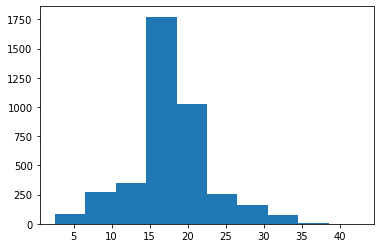

In [83]:
plt.hist(data_merged['NO2_annualMean']);

## NO2: hours over 200

In [23]:
print(data_merged.NO2_hrOver200.unique().min())
print(data_merged.NO2_hrOver200.unique().max())
print(data_merged.NO2_hrOver200.unique().mean())

0.0
2.0
0.009051628605752872


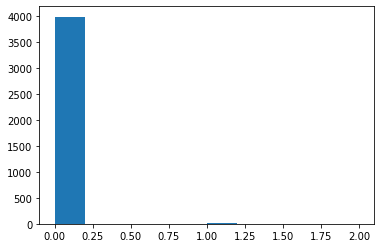

In [84]:
plt.hist(data_merged['NO2_hrOver200']);

## NO_annualMean

<AxesSubplot:>

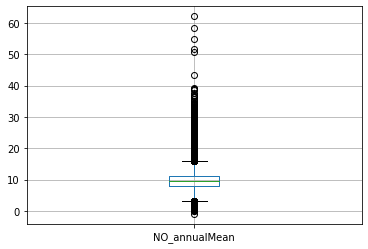

In [25]:
data_merged[['NO_annualMean']].boxplot()

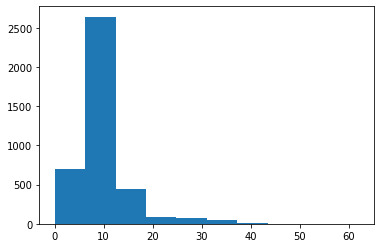

In [85]:
plt.hist(data_merged['NO_annualMean']);

In [27]:
data_merged.NO_annualMean.max()

62.09627

In [74]:
data_merged.sort_values(by=['NO_annualMean'], ascending=True)

,Unnamed: 0,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,...,PM10_daysOver50,PM2.5_annualMean,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
2389,2389,LK Siegen-Wittgenstein,2019,4.056616,0.0,-0.945949,69.115190,17.000000,85.480130,201.974000,...,1.000000,12.275886,Nordrhein-Westfalen,275491,1.133230e+09,1.226839,15813,194,5739.933428,70.419723
2381,2381,LK Siegen-Wittgenstein,2011,4.721723,0.0,-0.048492,61.474710,0.688322,74.386172,179.005037,...,0.000000,13.299298,Nordrhein-Westfalen,275491,1.133230e+09,1.226839,15813,194,5739.933428,70.419723
2380,2380,LK Siegen-Wittgenstein,2010,5.249165,0.0,0.004320,63.525510,0.668655,74.355187,178.995242,...,0.000000,13.269376,Nordrhein-Westfalen,275491,1.133230e+09,1.226839,15813,194,5739.933428,70.419723
323,323,LK Breisgau-Hochschwarzwald,2013,2.516423,0.0,0.301613,68.855390,17.000000,89.523750,186.266700,...,3.666667,6.578736,Baden-Württemberg,264867,1.376032e+09,1.643115,12172,200,4595.513975,75.509595
1750,1750,LK Oberhavel,2010,5.278123,0.0,0.318192,56.115360,1.430661,75.555663,179.374746,...,11.000000,11.496330,Brandenburg,214234,1.810087e+09,2.957864,10751,318,5018.344427,148.435823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,3297,SK Gelsenkirchen,2017,29.549040,0.0,50.813440,50.076474,1.295424,75.342609,179.307394,...,5.000000,17.951330,Nordrhein-Westfalen,259105,1.052658e+08,2.208835,19920,440,7688.002933,169.815326
3295,3295,SK Gelsenkirchen,2015,29.613750,0.0,51.794220,49.822400,1.191779,75.179324,179.255775,...,7.000000,16.580440,Nordrhein-Westfalen,259105,1.052658e+08,2.208835,19920,440,7688.002933,169.815326
3294,3294,SK Gelsenkirchen,2014,29.900460,0.0,54.724420,49.479214,1.051781,74.958771,179.186052,...,5.000000,18.084380,Nordrhein-Westfalen,259105,1.052658e+08,2.208835,19920,440,7688.002933,169.815326
3298,3298,SK Gelsenkirchen,2018,28.866170,0.0,58.366340,50.860955,1.615440,75.846766,179.466772,...,4.000000,18.190020,Nordrhein-Westfalen,259105,1.052658e+08,2.208835,19920,440,7688.002933,169.815326


In [26]:
data_merged.NO_annualMean.min()

-0.9459491

!!!! Data to look further into

In [78]:
data_merged['NO_annualMean'] = data_merged['NO_annualMean'].apply(lambda x : x if x > 0 else 0)

In [79]:
data_merged.NO_annualMean.min()

0.0

## O3 annual Mean

<AxesSubplot:>

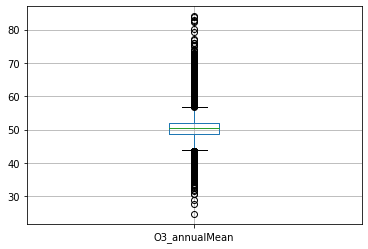

In [29]:
data_merged[['O3_annualMean']].boxplot()

In [32]:
print(data_merged.O3_annualMean.min())
print(data_merged.O3_annualMean.max())

24.68885
83.99883


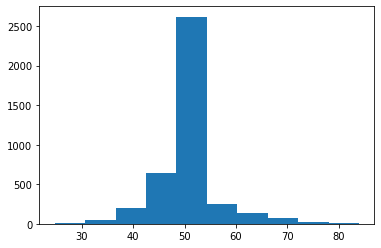

In [86]:
plt.hist(data_merged['O3_annualMean']);

## O3 daysOver120

<AxesSubplot:>

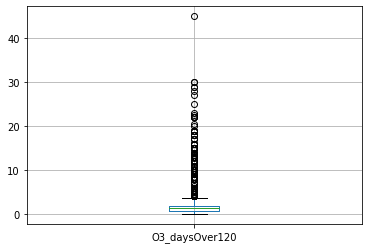

In [35]:
data_merged[['O3_daysOver120']].boxplot()

In [36]:
print(data_merged.O3_daysOver120.min())
print(data_merged.O3_daysOver120.max())

0.0
45.0


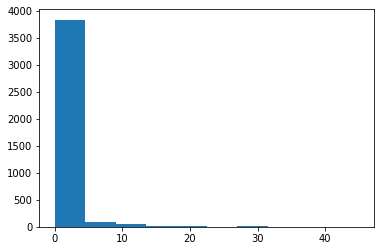

In [87]:
plt.hist(data_merged['O3_daysOver120']);

## O3 dailyMaxAnnualMean

<AxesSubplot:>

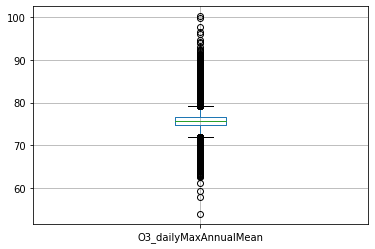

In [37]:
data_merged[['O3_dailyMaxAnnualMean']].boxplot()

In [38]:
print(data_merged.O3_dailyMaxAnnualMean.min())
print(data_merged.O3_dailyMaxAnnualMean.max())

53.9256
100.2454


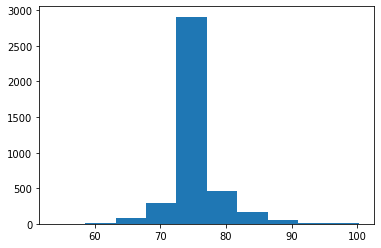

In [88]:
plt.hist(data_merged['O3_dailyMaxAnnualMean']);

## O3 dailyHourlyMax

<AxesSubplot:>

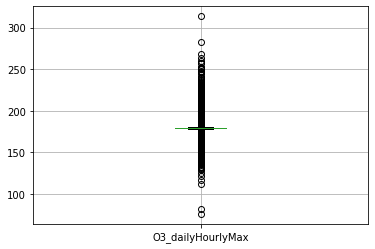

In [40]:
data_merged[['O3_dailyHourlyMax']].boxplot()

In [41]:
print(data_merged.O3_dailyHourlyMax.min())
print(data_merged.O3_dailyHourlyMax.max())

76.08353
313.6


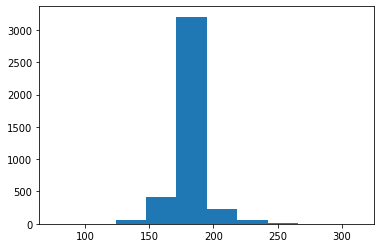

In [89]:
plt.hist(data_merged['O3_dailyHourlyMax']);

## PM10 annual Mean

<AxesSubplot:>

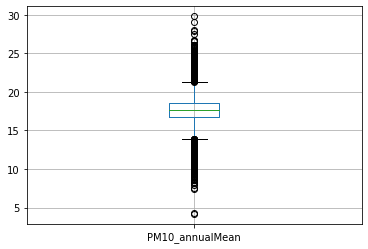

In [48]:
data_merged[['PM10_annualMean']].boxplot()

In [49]:
print(data_merged.PM10_annualMean.min())
print(data_merged.PM10_annualMean.max())

4.169562
29.80406


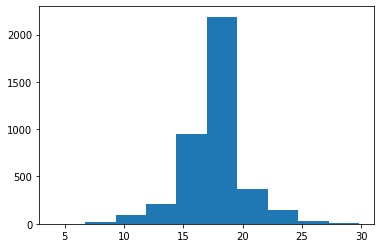

In [90]:
plt.hist(data_merged['PM10_annualMean']);

## PM10 days Over 50

<AxesSubplot:>

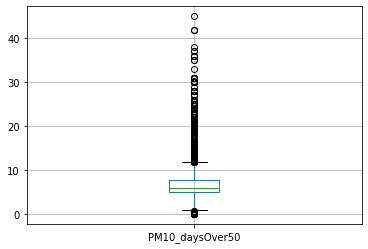

In [44]:
data_merged[['PM10_daysOver50']].boxplot()

In [45]:
print(data_merged.PM10_daysOver50.min())
print(data_merged.PM10_daysOver50.max())

0.0
45.0


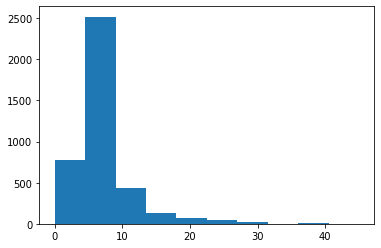

In [91]:
plt.hist(data_merged['PM10_daysOver50']);

## PM2.5 annual Mean

<AxesSubplot:>

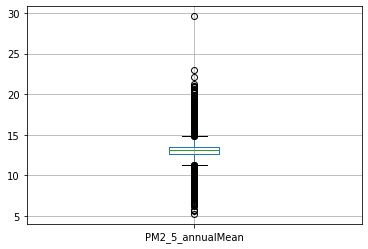

In [76]:
data_merged[['PM2_5_annualMean']].boxplot()

In [77]:
print(data_merged.PM2_5_annualMean.min())
print(data_merged.PM2_5_annualMean.max())

5.254934
29.59881


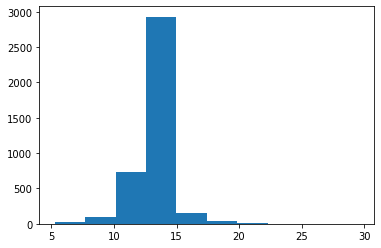

In [92]:
plt.hist(data_merged['PM2_5_annualMean']);

## Death rate

<AxesSubplot:>

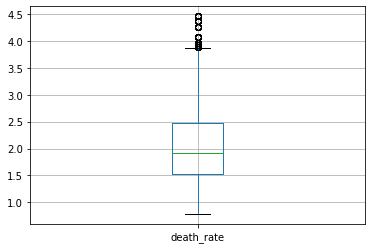

In [56]:
data_merged[['death_rate']].boxplot()

In [57]:
print(data_merged.death_rate.min())
print(data_merged.death_rate.max())

0.78125
4.46345198520898


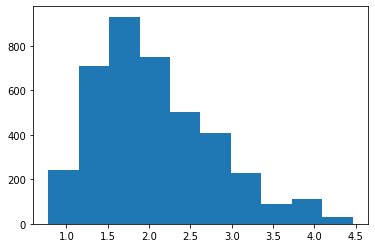

In [93]:
plt.hist(data_merged['death_rate']);

## Cases

<AxesSubplot:>

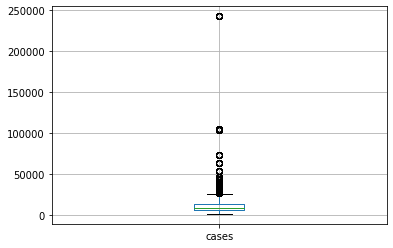

In [58]:
data_merged[['cases']].boxplot()

In [59]:
print(data_merged.cases.min())
print(data_merged.cases.max())

1152
242813


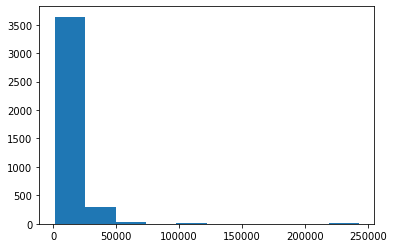

In [94]:
plt.hist(data_merged['cases']);

## Cases per 100k

<AxesSubplot:>

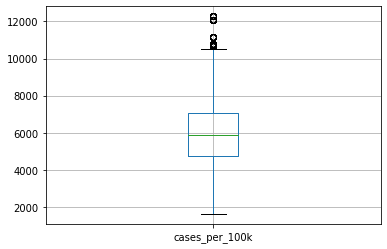

In [60]:
data_merged[['cases_per_100k']].boxplot()

In [61]:
print(data_merged.cases_per_100k.min())
print(data_merged.cases_per_100k.max())

1638.15296127651
12268.7298330607


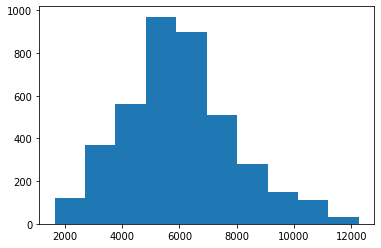

In [95]:
plt.hist(data_merged['cases_per_100k']);

## Deaths per 100k

<AxesSubplot:>

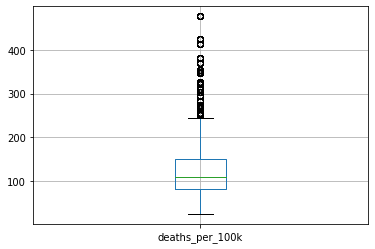

In [63]:
data_merged[['deaths_per_100k']].boxplot()

In [62]:
print(data_merged.deaths_per_100k.min())
print(data_merged.deaths_per_100k.max())

24.020526631849037
476.9354800086208


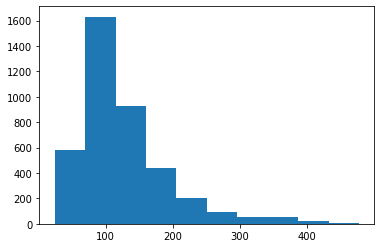

In [96]:
plt.hist(data_merged['deaths_per_100k']);